In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

def find_barycenter_deterministic(adj_matrix):
    adj_matrix_copy = copy.deepcopy(adj_matrix)
    n = len(adj_matrix_copy)
    degrees = np.sum(adj_matrix_copy, axis=1)
    nodes = set(range(n))
    
    while len(nodes) > 2:
        leaf_nodes = [i for i in nodes if degrees[i] == 1]
        
        for leaf in leaf_nodes:
            nodes.remove(leaf)
            degrees[leaf] = 0

            for neighbor in range(n):
                if adj_matrix_copy[leaf][neighbor] == 1:
                    degrees[neighbor] -= 1
                    adj_matrix_copy[leaf][neighbor] = 0
                    adj_matrix_copy[neighbor][leaf] = 0

    remaining_nodes = list(nodes)

    if len(remaining_nodes) == 1:
        return remaining_nodes, adj_matrix_copy
    elif len(remaining_nodes) == 2:
        return remaining_nodes, adj_matrix_copy

def find_barycenter_prob(matrix, vertex_to_remove):

    matrix_copy = copy.deepcopy(matrix)

    row_c = [0, 1]

    for i in vertex_to_remove:
        if vertex_to_remove.count(i) >= 2:
            return i  

    while len(row_c) != 0:
        row, column = row_colum_returner(matrix_copy, vertex_to_remove)
        row_c = row

        if len(row_c) == 0:
            break

        for r, c in zip(row, column):
            matrix_copy = make_that_1_into_0_with_transpose(matrix_copy, r, c)

 
    for s, i in enumerate(matrix_copy):
        if sum(i) == 3:
            return s  #

    for i in vertex_to_remove:
        if sum(matrix_copy[i]) == 2:
            return i  

 
    return None

def row_colum_returner(matrix, vertex_to_remove):
    s= 0 
    column = []
    row = []
    for i in matrix:
        if sum(i) == 1:
            if s in vertex_to_remove:
                pass
            if s not in vertex_to_remove:
                d = 0
                for v in i:
                    if v==1:
                        row.append(s)
                        column.append(d)
                    d+=1
                        
    
        s+=1

    return row, column


In [13]:
def draw_graph_from_adjacency_matrix(adjacency_matrix):
    G = nx.Graph()

    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] != 0: 
                G.add_edge(i, j, weight=adjacency_matrix[i][j])


    G.add_nodes_from(range(len(adjacency_matrix)))

    pos = nx.spring_layout(G, seed=42)

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='lightblue',
        edge_color='black',
        node_size=10,
        font_size=10,
        width=0.5
    )
    plt.title("Graph from Adjacency Matrix")
    plt.show()

def make_that_1_into_0_with_transpose(matrix, row, column):
    matrix[row][column] = 0
    matrix[column][row] = 0


    return matrix

In [21]:
def calculate_u_new(matrix):
    row_count = max(len(i) for i in matrix)
    u_new = [0] * row_count
    u_old = [1 / row_count] * row_count
    
    for i in range(0, row_count):
        for j in range(0, row_count):
            for k in range(0, row_count):
                center = find_barycenter_prob(matrix, vertex_to_remove=[i, j, k])
                u_new[center] += u_old[i] * u_old[j] * u_old[k]
    
    return u_new

In [22]:
from uniform_attachment_model import matrix_uniform_attachment

In [35]:
matrix = matrix_uniform_attachment(12)

In [36]:
vertex, matrix_adj = find_barycenter_deterministic(matrix)

In [37]:
vertex

[1]

In [38]:
u_new = calculate_u_new(matrix)
vertex_prob=  u_new.index(max(u_new))
vertex_prob

4

In [39]:
u_new

[0.054398148148148216,
 0.2696759259259244,
 0.08217592592592611,
 0.054398148148148216,
 0.33217592592592615,
 0.01967592592592591,
 0.054398148148148216,
 0.01967592592592591,
 0.01967592592592591,
 0.054398148148148216,
 0.01967592592592591,
 0.01967592592592591]

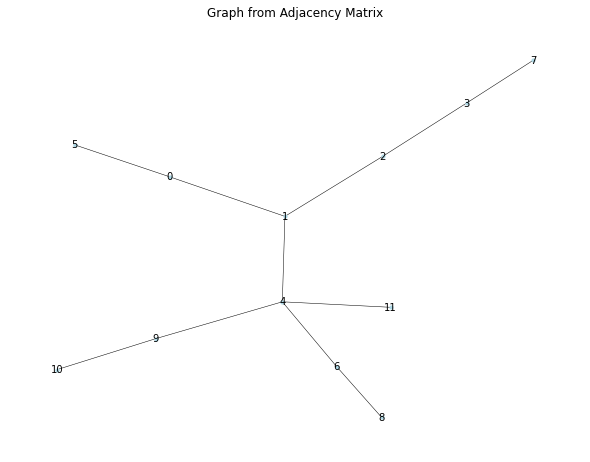

In [40]:
draw_graph_from_adjacency_matrix(matrix)